In [1]:
import pandas as pd
import json

# data = pd.read_json("experiments/results/baseline_no_ref/search_results.jsonl", lines=True)
# data.head()
json_data = [json.loads(line) for line in open("experiments/results/test/search_results.jsonl")]
print(f"Got {len(json_data)} records")

Got 100 records


In [2]:
from rank_fuser import RankFuser

rf = RankFuser(
    config={
        "recency": 0.5,
        "log_citations": 0.5,
    }
)
print([metric.name for metric in rf.metrics])
print(rf.weights)

['recency', 'log_citations']
[0.5, 0.5]


In [3]:
reranked_df = rf.rerank(json_data)

In [4]:
print(type(reranked_df[0]))
print(type(reranked_df[0]["results"]))
print(reranked_df[0]["results"])

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
     pubdate  citation_count  \
0   20030201             909   
1   20030201             909   
2   20001001             888   
3   20061001             197   
4   19970301             862   
5   19991101             609   
6   19800701            1411   
7   20050801             132   
8   19881001             494   
9   20020901             119   
10  20020901             119   
11  19950601             244   
12  19661101             732   
13  19950101             236   
14  19831101             408   
15  19831101             408   
16  19980901             130   
17  19931001              91   
18  19960401              57   
19  19881001              78   

                                                 text  \
0   Note that the 2MASS images may not be sensitiv...   
1   Figure 2 shows NGC 253 as seen in the near‐inf...   
2   Two events for which we have an HST image (eve...   
3   On a larger scale Phillips et al. ( 1996 )

In [ ]:
from statistics_computation import compute_statistics, stat_diffs

old_stats = compute_statistics(json_data)
for key, value in old_stats.items():
    print(f"{key}: {value[:10]}")

new_stats = compute_statistics(reranked_df)
for key, value in new_stats.items():
    print(f"{key}: {value[:10]}")

Computing statistics: 100%|██████████| 100/100 [00:00<00:00, 6150.01it/s]


hitrate: [0.2  0.31 0.35 0.37 0.41 0.42 0.45 0.47 0.47 0.5 ]
iou: [0.16083333 0.167      0.15583333 0.1445     0.14169048 0.13761905
 0.13634524 0.12967857 0.12664683 0.12249603]
recall: [0.16083333 0.26083333 0.30083333 0.32666667 0.36       0.3775
 0.4075     0.4275     0.4325     0.4575    ]


Computing statistics: 100%|██████████| 100/100 [00:00<00:00, 5266.51it/s]

hitrate: [0.06 0.1  0.13 0.21 0.22 0.29 0.31 0.33 0.36 0.39]
iou: [0.04833333 0.07       0.07166667 0.09542857 0.09175    0.09820635
 0.09570238 0.09400397 0.0958254  0.09726227]
recall: [0.04833333 0.08333333 0.10583333 0.1725     0.1825     0.2375
 0.26583333 0.28083333 0.30583333 0.33083333]


In [ ]:
diffs = stat_diffs(old_stats, new_stats)

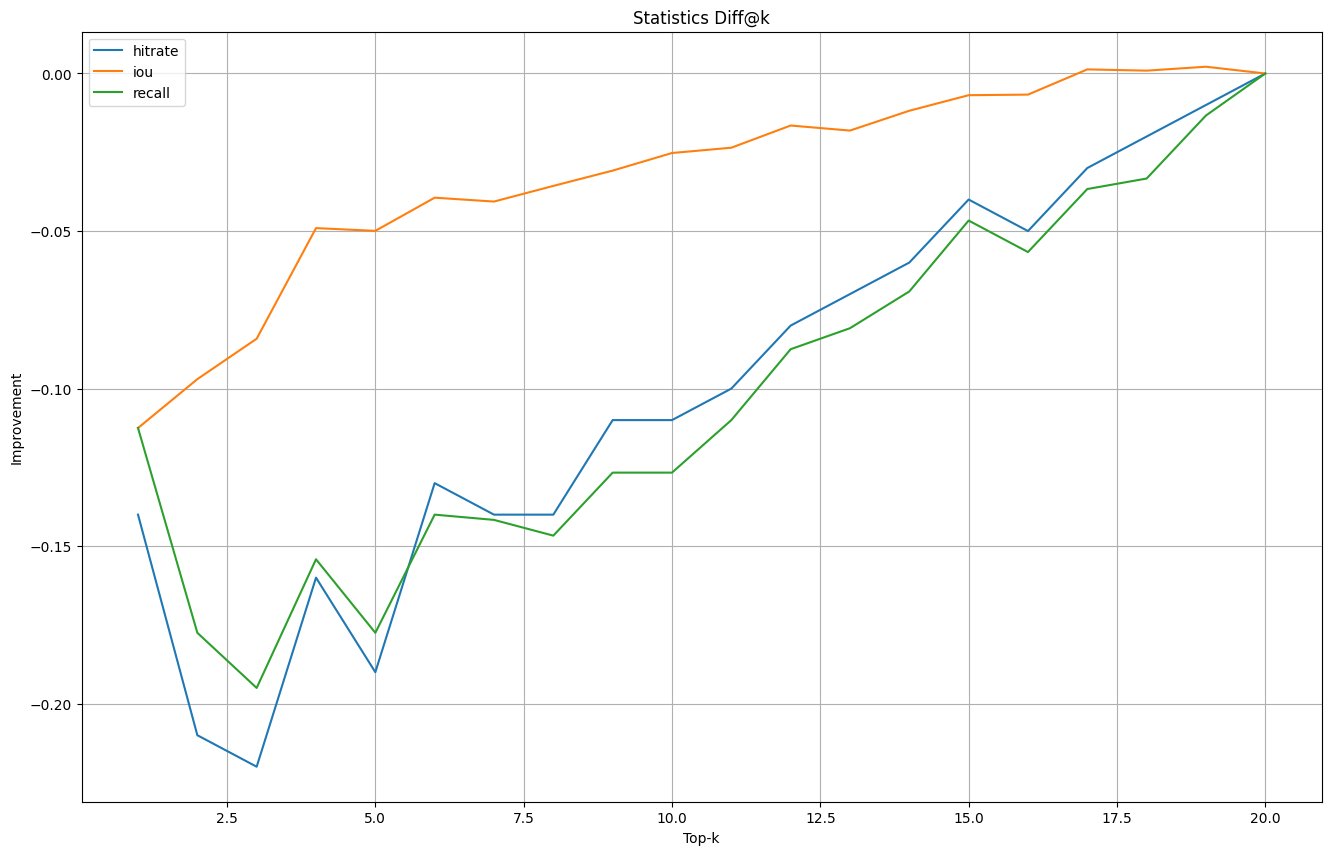

In [11]:
import matplotlib.pyplot as plt

# plot the diffs arrays hitrate, iou, and recall on the same plot
plt.figure(figsize=(16, 10))
# NOTE: this assumes all arrays have same length, came from same top k and k were in fact retrieved
k_values = [k for k in range(1, len(diffs["hitrate"]) + 1)]

lines = []
for label, values in diffs.items():
    (line, ) = plt.plot(k_values, values, label=label)
plt.title("Statistics Diff@k")
plt.xlabel("Top-k")
plt.ylabel("Improvement")
plt.legend()
plt.grid()
plt.show()